<a href="https://colab.research.google.com/github/gsasikiran/asus_combined/blob/sasi/asus_combined_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


## Looking at the data:

**How data is retrieved??**
*  Initially, the folders with dataset were pushed to github folder.
*  That github repository is cloned and saved the dataset folder in colab
* That path is given in the path_dataset

In [4]:
!git clone https://github.com/gsasikiran/asus_combined.git

Cloning into 'asus_combined'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 21760 (delta 4), reused 5 (delta 1), pack-reused 21745
Receiving objects: 100% (21760/21760), 154.58 MiB | 29.62 MiB/s, done.
Resolving deltas: 100% (1015/1015), done.
Checking out files: 100% (21714/21714), done.


In [0]:
# Defining paths and assigning data
path_dataset = 'asus_combined/asus_combined_dataset/'
tfms = get_transforms(do_flip=False, flip_vert=False)
data = (ImageList.from_folder(path_dataset).random_split_by_pct().label_from_folder().transform(tfms, size=112).databunch())

**Reference:**
1. https://forums.fast.ai/t/unable-to-create-imagedatabunch-from-folders/36923

['AXIS', 'BEARING', 'BEARING_BOX', 'CONTAINER_BOX_BLUE', 'CONTAINER_BOX_RED', 'DECOY', 'DISTANCE_TUBE', 'F20_20_B', 'F20_20_G', 'M20', 'M20_100', 'M30', 'MOTOR', 'R20', 'S40_40_B', 'S40_40_G'] 16


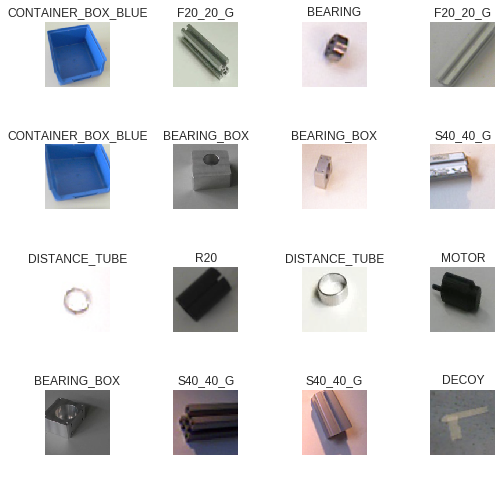

In [6]:
print(data.classes,data.c)
data.show_batch(rows = 4, figsize = (7,7))


'data.show_batch' infers that:
*  Training_data = 17365 items
*  Validation_data = 4341 items
*  Test_data = None

## Training

In [7]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 25969341.89it/s]


In [8]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,0.451587,0.167451,0.056669,01:35
2,0.189974,0.065809,0.020963,01:35
3,0.126936,0.040272,0.010136,01:36
4,0.102186,0.037732,0.010366,01:35


In [0]:
learn.save('stage-1 results')

## Results

In [0]:
interpretation = ClassificationInterpretation.from_learner(learn)


In [0]:
losses, indices = interpretation.top_losses()

In [13]:
len(data.valid_ds) == len(losses) == len(indices)

True

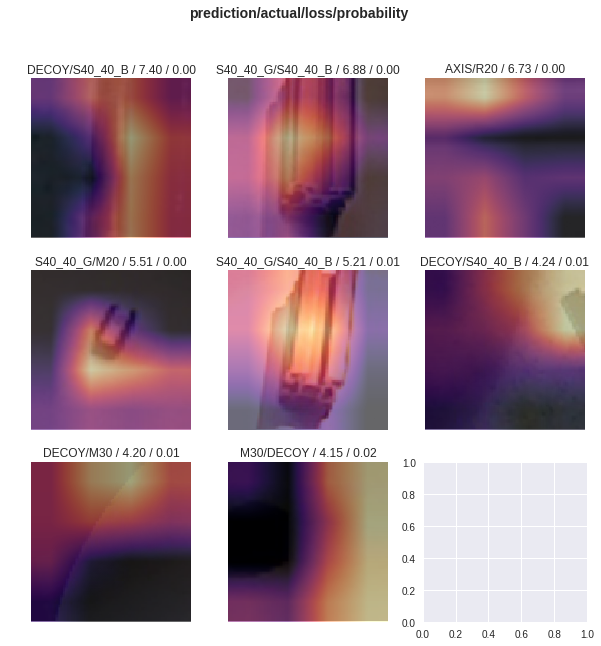

In [19]:
#Plotting the top losses
interpretation.plot_top_losses(8, figsize=(10,10))


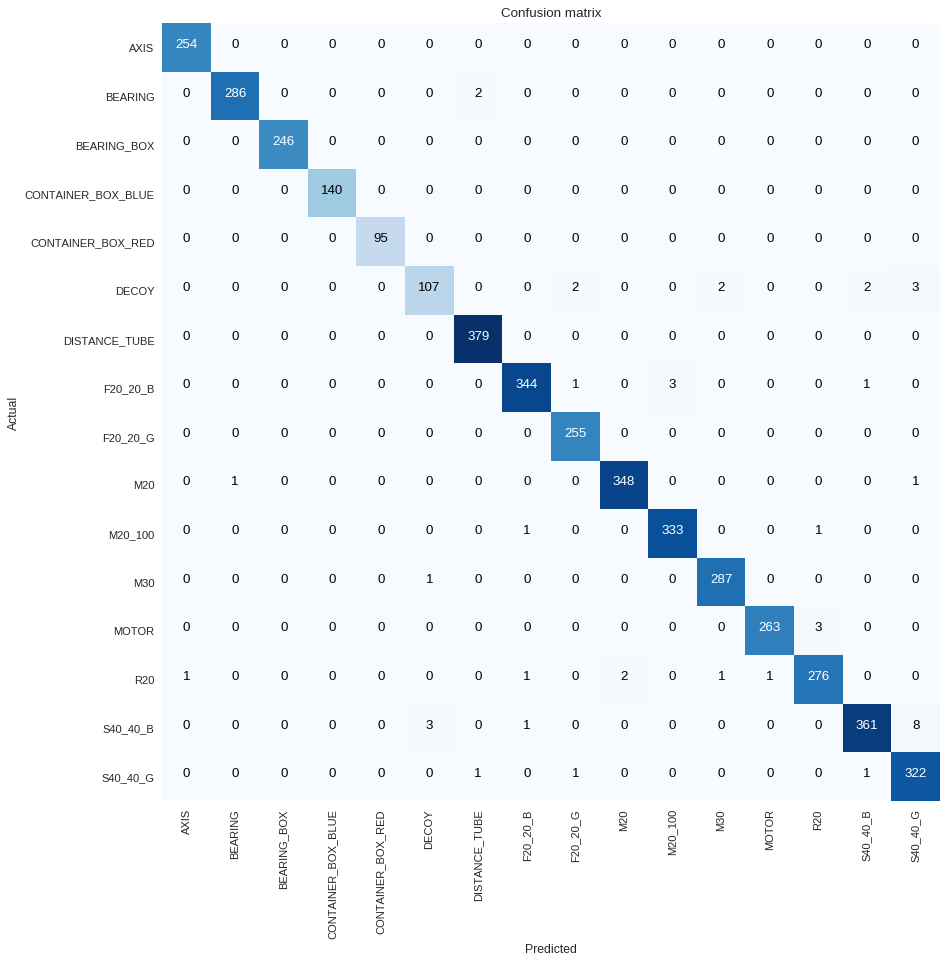

In [23]:
interpretation.plot_confusion_matrix(figsize = (12,12), dpi = 80)

In [25]:
interpretation.most_confused(min_val=2)
#returns[(actual, predict, number of occurences)]

[('S40_40_B', 'S40_40_G', 8),
 ('DECOY', 'S40_40_G', 3),
 ('F20_20_B', 'M20_100', 3),
 ('MOTOR', 'R20', 3),
 ('S40_40_B', 'DECOY', 3),
 ('BEARING', 'DISTANCE_TUBE', 2),
 ('DECOY', 'F20_20_G', 2),
 ('DECOY', 'M30', 2),
 ('DECOY', 'S40_40_B', 2),
 ('R20', 'M20', 2)]

## Unfreeze

In [0]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(2, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
1,0.052967,0.021776,0.005298,01:47
2,0.040353,0.020725,0.004838,01:42


In [0]:
learn.load('stage-1 results');

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


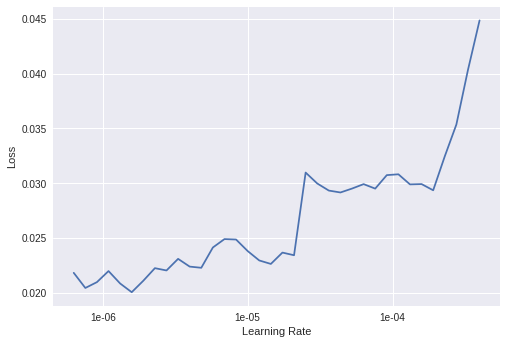

In [41]:
learn.recorder.plot()

In [0]:
interpretaor_after_lr = ClassificationInterpretation.from_learner(learn)

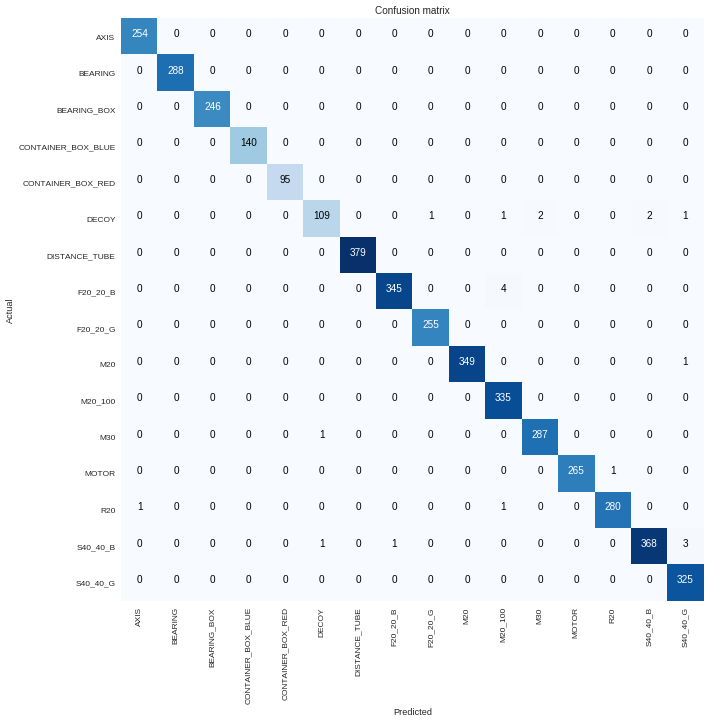

In [48]:
interpretaor_after_lr.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [49]:
interpretaor_after_lr.most_confused(min_val=3)

[('F20_20_B', 'M20_100', 4), ('S40_40_B', 'S40_40_G', 3)]